In [1]:
# Explanation of Bagging and Boosting
print("\nBagging (Bootstrap Aggregating) reduces variance by training multiple models on different subsets of data and averaging their predictions. Example: Random Forest.")
print("\nBoosting trains models sequentially, with each new model focusing on correcting errors made by previous ones. Example: AdaBoost, Gradient Boosting.")

# Explanation of Handling Imbalanced Data
print("\nHandling imbalanced data techniques:")
print("1. Oversampling (e.g., SMOTE) - Synthesizes new minority class samples.")
print("2. Undersampling - Reduces the number of majority class samples.")
print("3. Class Weighting - Assigns higher weights to the minority class.")
print("4. Ensemble Methods (Balanced Random Forest, Boosting techniques).")


Bagging (Bootstrap Aggregating) reduces variance by training multiple models on different subsets of data and averaging their predictions. Example: Random Forest.

Boosting trains models sequentially, with each new model focusing on correcting errors made by previous ones. Example: AdaBoost, Gradient Boosting.

Handling imbalanced data techniques:
1. Oversampling (e.g., SMOTE) - Synthesizes new minority class samples.
2. Undersampling - Reduces the number of majority class samples.
3. Class Weighting - Assigns higher weights to the minority class.
4. Ensemble Methods (Balanced Random Forest, Boosting techniques).


In [3]:
# Load the dataset from the identified sheet
df = pd.read_excel(r"D:\Downloads\glass (1).xlsx", sheet_name="glass")

# Display basic information about the dataset
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


(None,
         RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
 0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
 1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
 2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
 3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
 4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1)

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Check basic statistics of the dataset
summary_stats = df.describe()

missing_values, summary_stats


(RI      0
 Na      0
 Mg      0
 Al      0
 Si      0
 K       0
 Ca      0
 Ba      0
 Fe      0
 Type    0
 dtype: int64,
                RI          Na          Mg          Al          Si           K  \
 count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
 mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
 std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
 min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
 25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
 50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
 75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
 max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   
 
                Ca          Ba          Fe        Type  
 count  214.000000  214.000000  214.000000  214.000000  
 mean     8.956963   

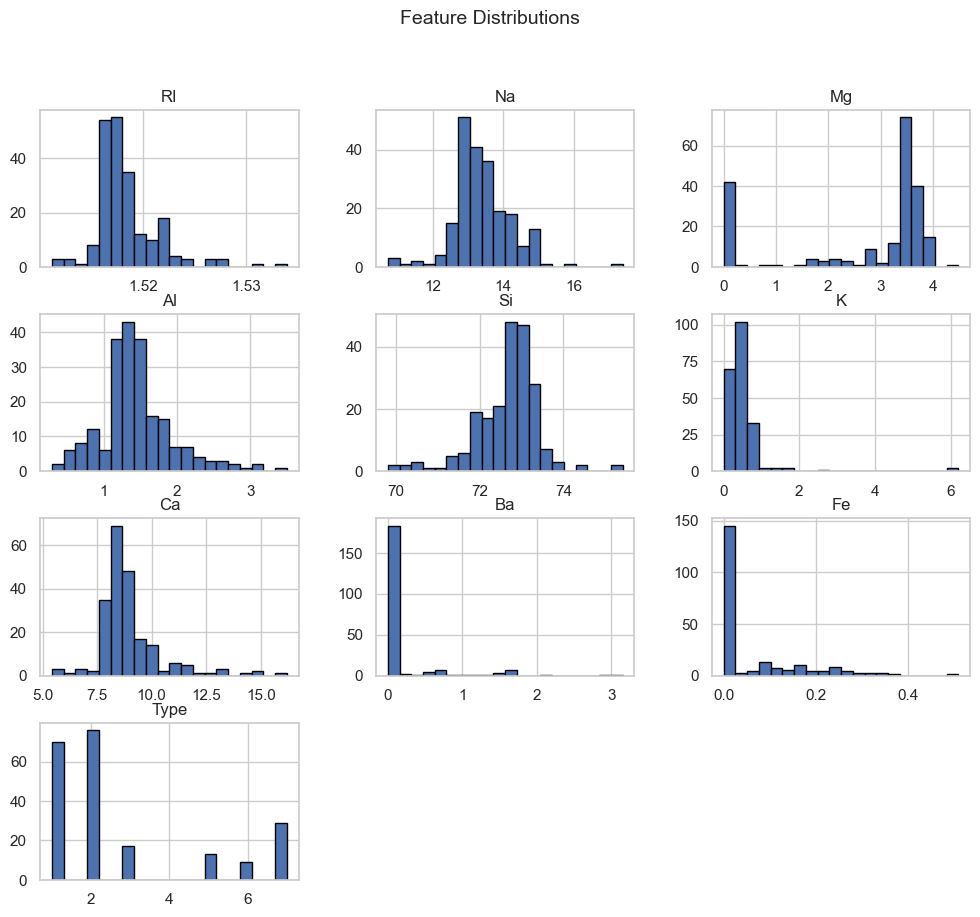

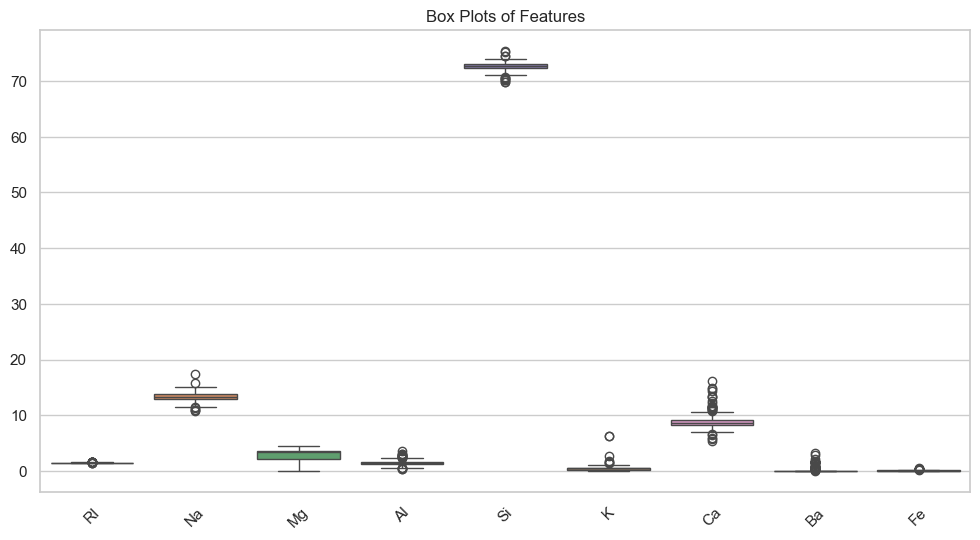

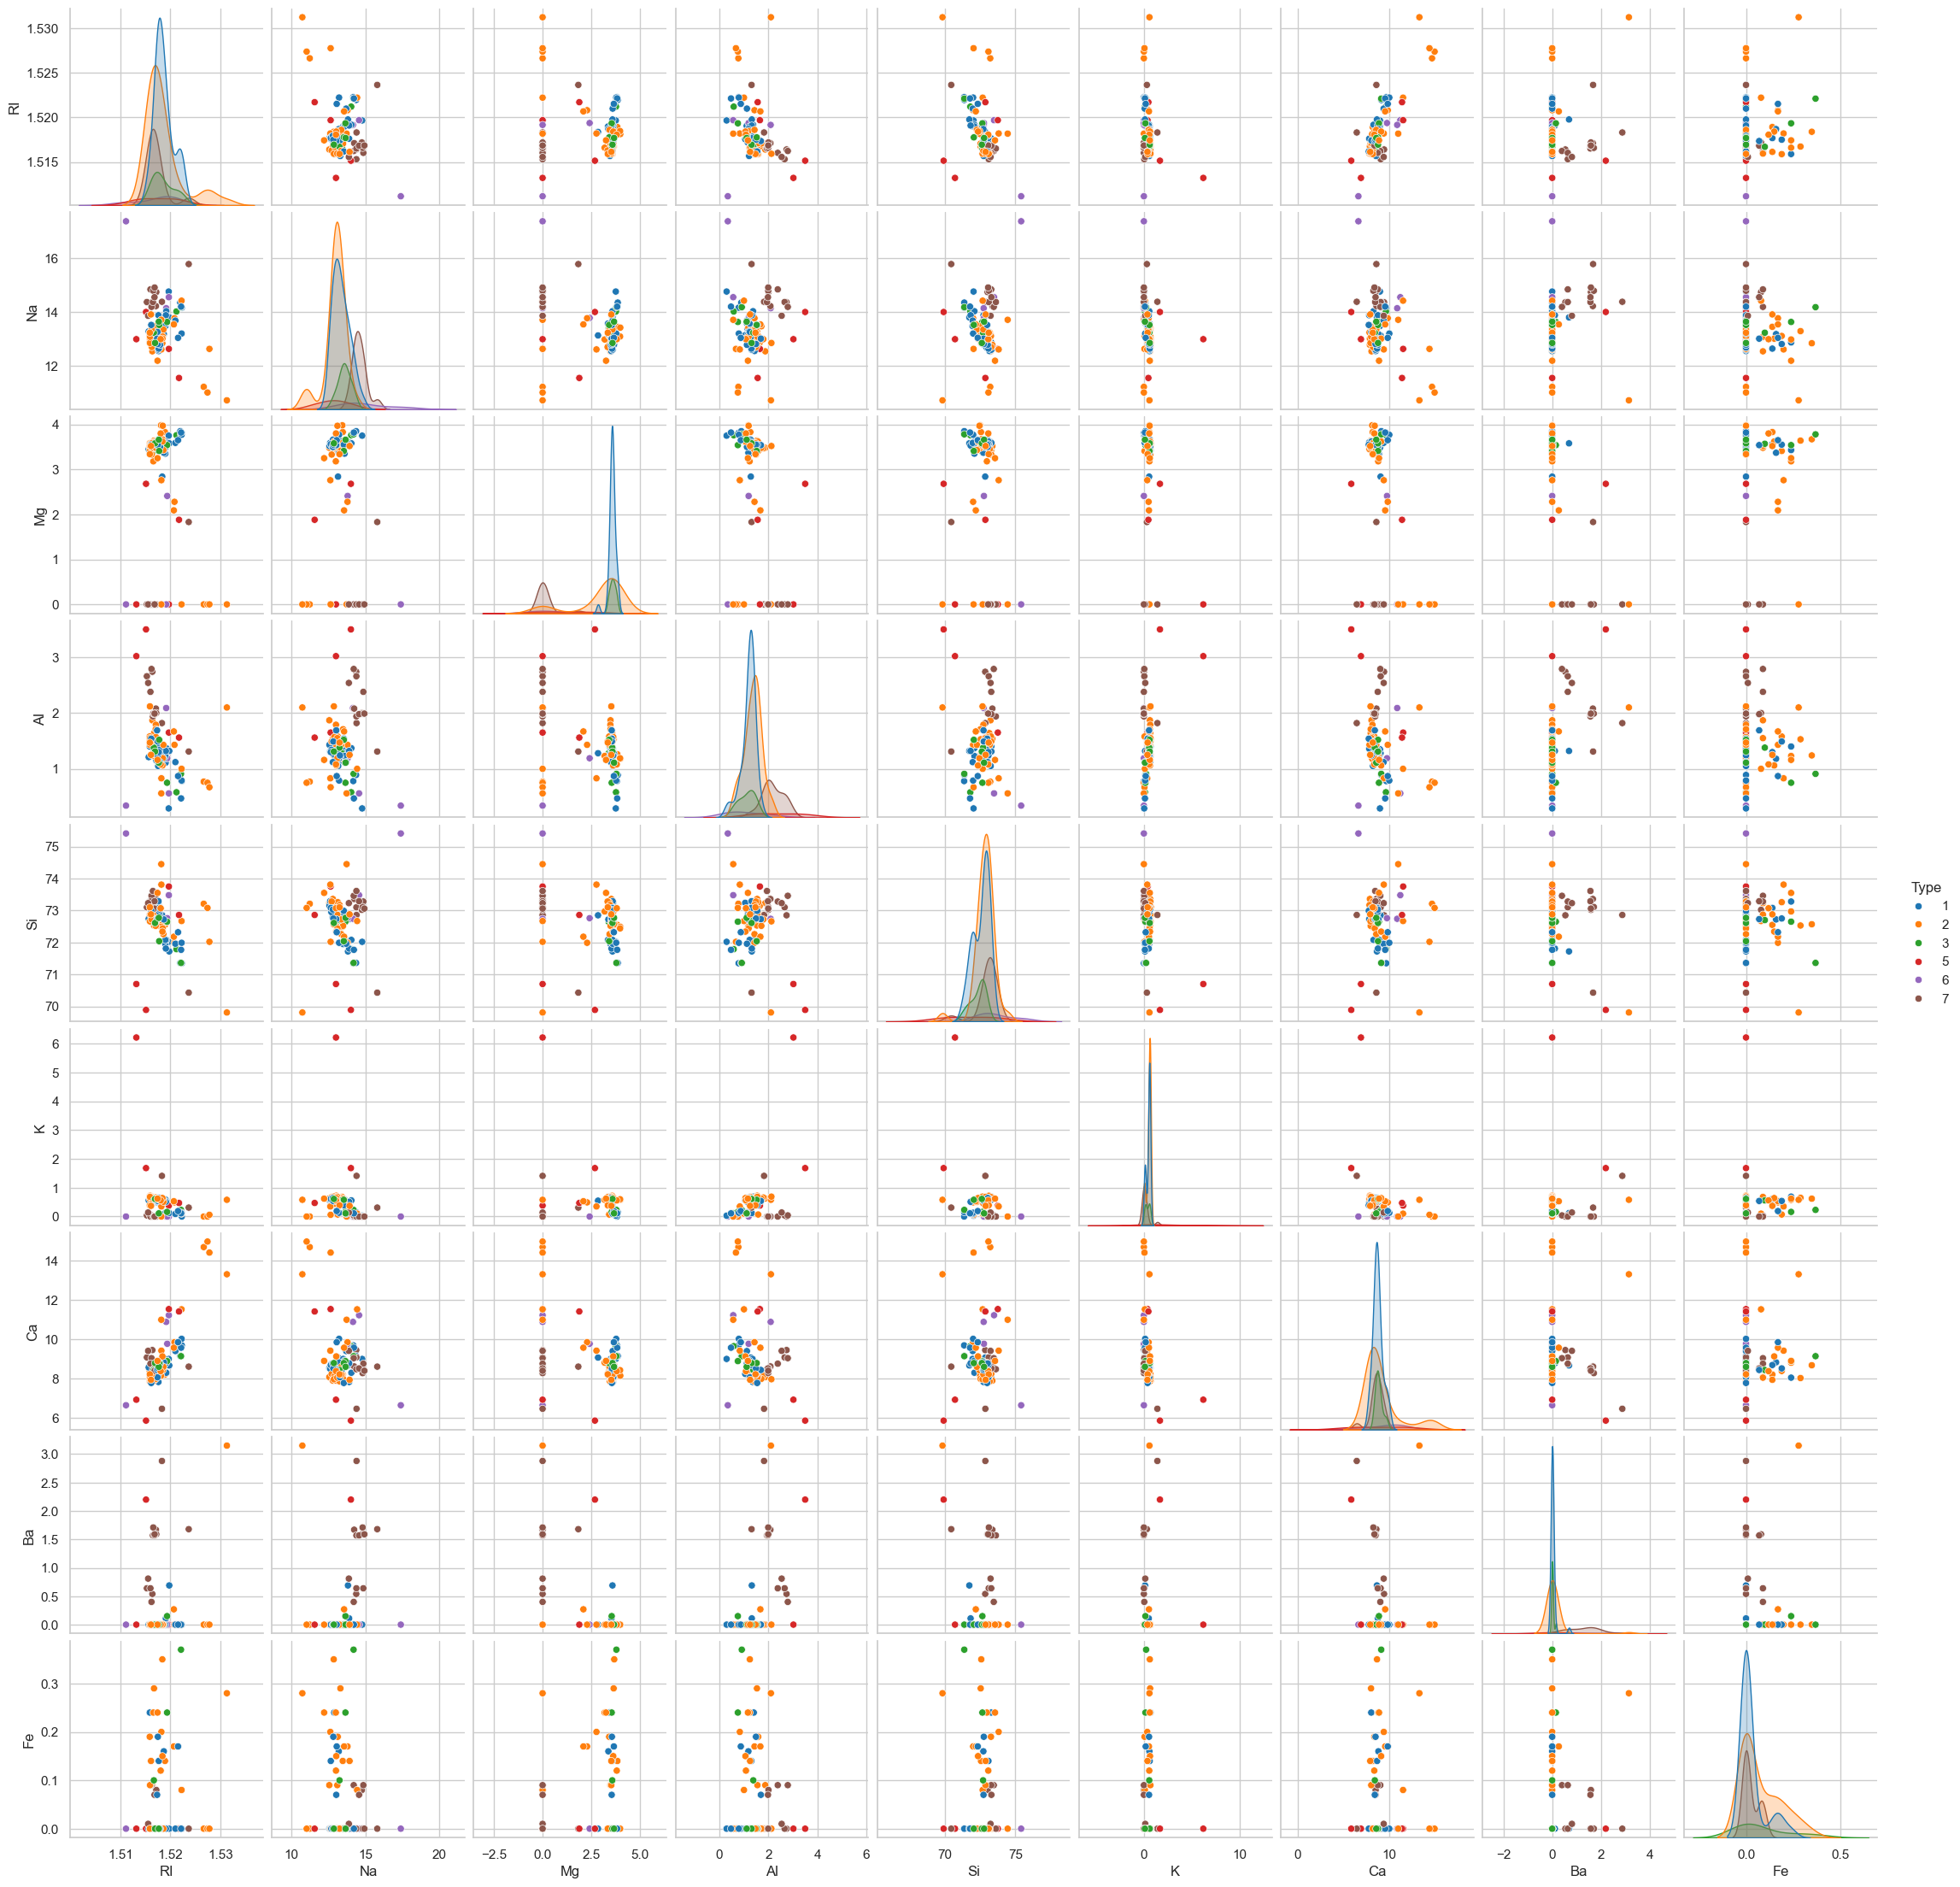

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Histograms for numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=14)
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude target variable
plt.xticks(rotation=45)
plt.title("Box Plots of Features")
plt.show()

# Pairplot to analyze relationships between features (sampling for performance)
sns.pairplot(df.sample(100), hue="Type", diag_kind="kde", palette="tab10")
plt.show()


In [6]:
from sklearn.preprocessing import StandardScaler
from collections import Counter

# Check class distribution (imbalance check)
class_distribution = Counter(df["Type"])

# Apply standardization (excluding the target variable)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

class_distribution, df_scaled.head()


(Counter({2: 76, 1: 70, 7: 29, 3: 17, 5: 13, 6: 9}),
          RI        Na        Mg        Al        Si         K        Ca  \
 0  0.872868  0.284953  1.254639 -0.692442 -1.127082 -0.671705 -0.145766   
 1 -0.249333  0.591817  0.636168 -0.170460  0.102319 -0.026213 -0.793734   
 2 -0.721318  0.149933  0.601422  0.190912  0.438787 -0.164533 -0.828949   
 3 -0.232831 -0.242853  0.698710 -0.310994 -0.052974  0.112107 -0.519052   
 4 -0.312045 -0.169205  0.650066 -0.411375  0.555256  0.081369 -0.624699   
 
          Ba        Fe  Type  
 0 -0.352877 -0.586451     1  
 1 -0.352877 -0.586451     1  
 2 -0.352877 -0.586451     1  
 3 -0.352877 -0.586451     1  
 4 -0.352877 -0.586451     1  )

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into features (X) and target (y)
X = df_scaled.iloc[:, :-1]
y = df_scaled["Type"]  # Target variable

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Implement Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(0.813953488372093,
 '              precision    recall  f1-score   support\n\n           1       0.75      0.86      0.80        14\n           2       0.85      0.73      0.79        15\n           3       0.67      0.67      0.67         3\n           5       1.00      0.67      0.80         3\n           6       0.67      1.00      0.80         2\n           7       1.00      1.00      1.00         6\n\n    accuracy                           0.81        43\n   macro avg       0.82      0.82      0.81        43\nweighted avg       0.83      0.81      0.81        43\n')

In [10]:
# Check scikit-learn version to confirm correct syntax
import sklearn

sklearn.__version__

'1.6.1'

In [12]:
# Workaround for compatibility in this environment
bagging_model = BaggingClassifier(DecisionTreeClassifier(random_state=42), 
                                  n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred_bagging = bagging_model.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

accuracy_bagging




0.6976744186046512